In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_market = pd.read_csv('market.csv', index_col='Date', parse_dates=True)

In [3]:
df_market.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df_market.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
df_market.shape

(1000, 16)

In [6]:
df_market.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df_market.duplicated().sum()

0

In [8]:
df_market.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
df_market = df_market.sort_values('Date')

In [10]:
df_market.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,4.761905,43.749,6.0
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,4.761905,4.072,9.5
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,4.761905,14.523,6.7
2019-03-30,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,10:18,Cash,447.40,4.761905,22.370,7.4
2019-03-30,676-39-6028,A,Yangon,Member,Female,Electronic accessories,64.44,5,16.110,338.310,17:04,Cash,322.20,4.761905,16.110,6.6


In [11]:
pivot_df = pd.pivot_table(df_market, index=['City', 'Product line'],
                          values=['Total','cogs','Quantity','Rating'],
                         aggfunc={'Total':np.sum,
                                  'cogs':np.sum,
                                  'Quantity':[np.sum, np.min, np.max],
                                  'Rating':np.mean
                                 }
                         )
pivot_df

Quantity              Rating       Total  \
                                     amax amin  sum      mean         sum   
City      Product line                                                      
Mandalay  Electronic accessories       10    1  316  7.116364  17051.4435   
          Fashion accessories          10    1  297  6.722581  16413.3165   
          Food and beverages           10    1  270  6.994000  15214.8885   
          Health and beauty            10    1  320  7.100000  19980.6600   
          Home and lifestyle           10    1  295  6.516000  17549.1645   
          Sports and travel            10    1  322  6.509677  19988.1990   
Naypyitaw Electronic accessories       10    1  333  6.747273  18968.9745   
          Fashion accessories          10    1  342  7.440000  21560.0700   
          Food and beverages           10    1  369  7.080303  23766.8550   
          Health and beauty            10    1  277  6.998077  16615.3260   
          Home and lifestyle           10    1  245  7.060000  13895.5530   
          Sports and travel            10    1  265  7.028889  15761.9280   
Yangon    Electronic accessories       10    1  322  6.911667  18317.1135   
          Fashion accessories          10    1  263  6.878431  16332.5085   
          Food and beverages           10    1  313  7.253448  17163.1005   
          Health and beauty            10    1  257  6.900000  12597.7530   
          Home and lifestyle           10    1  371  6.930769  22417.1955   
          Sports and travel            10    1  333  7.257627  19372.6995   

                                      cogs  
                                       sum  
City      Product line                      
Mandalay  Electronic accessories  16239.47  
          Fashion accessories     15631.73  
          Food and beverages      14490.37  
          Health and beauty       19029.20  
          Home and lifestyle      16713.49  
          Sports and travel       19036.38  
Naypyitaw Electronic accessories  18065.69  
          Fashion accessories     20533.40  
          Food and beverages      22635.10  
          Health and beauty       15824.12  
          Home and lifestyle      13233.86  
          Sports and travel       15011.36  
Yangon    Electronic accessories  17444.87  
          Fashion accessories     15554.77  
          Food and beverages      16345.81  
          Health and beauty       11997.86  
          Home and lifestyle      21349.71  
          Sports and travel       18450.19

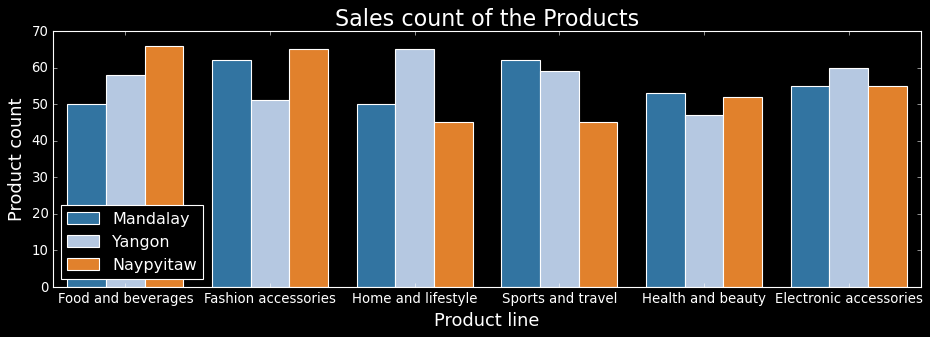

In [23]:
import seaborn as sns
plt.figure(figsize=(14,4))
plt.style.use('dark_background')
ax = sns.countplot(x = 'Product line', data=df_market, hue='City', palette= "tab20")
ax.set_xlabel(xlabel = "Product line", fontsize=16)
ax.set_ylabel(ylabel = "Product count", fontsize=16)
ax.set_title(label = "Sales count of the Products", fontsize=20)
ax.legend(loc='lower left')
plt.show()

In [14]:
df_market['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

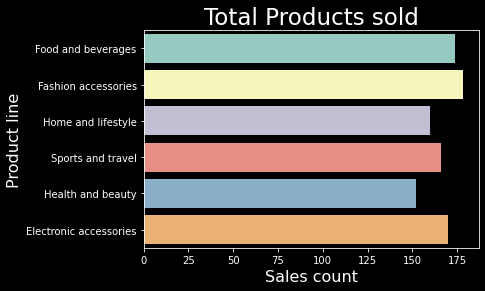

In [15]:

plt.figure(figsize=(6,4))
plt.style.use('dark_background')
ax = sns.countplot(y = 'Product line', data=df_market)
ax.set_xlabel(xlabel = "Sales count", fontsize=16)
ax.set_ylabel(ylabel = "Product line", fontsize=16)
ax.set_title(label = "Total Products sold", fontsize=23)
plt.show()

In [16]:
df_market.groupby(['Product line']).agg({'Quantity':'sum'})

,Quantity
Product line,
Electronic accessories,971
Fashion accessories,902
Food and beverages,952
Health and beauty,854
Home and lifestyle,911
Sports and travel,920


Text(0, 0.5, ' Customer Count')

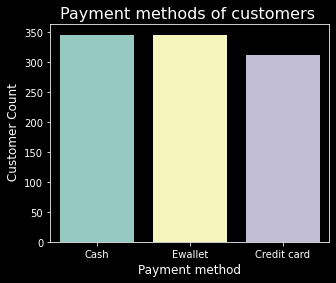

In [17]:
plt.figure(figsize = (5,4))
plt.style.use('dark_background')
ax = sns.countplot(x = "Payment", data = df_market)
ax.set_title(label = "Payment methods of customers ", fontsize= 16)
ax.set_xlabel(xlabel = "Payment method", fontsize = 12)
ax.set_ylabel(ylabel = " Customer Count", fontsize = 12)

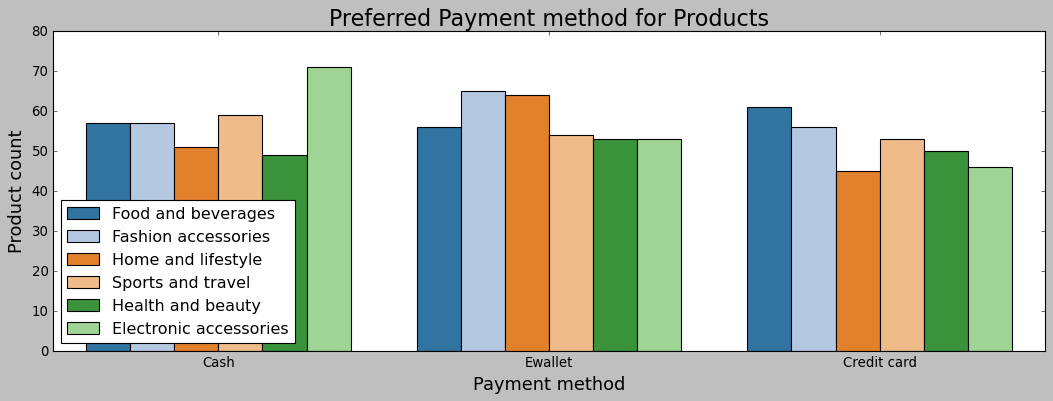

In [25]:
plt.figure(figsize = (16,5))
plt.style.use('classic')
ax = sns.countplot(x="Payment", hue = "Product line", data = df_market, palette= "tab20")
ax.set_title(label = "Preferred Payment method for Products", fontsize= 20)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "Product count", fontsize = 16)
ax.legend(loc='lower left')

Text(0, 0.5, 'Rating distribution')

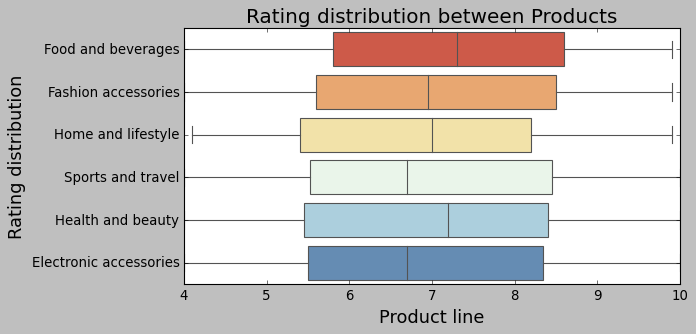

In [26]:
plt.figure(figsize=(8,4)) 
ax = sns.boxplot(y="Product line", x = "Rating" ,data =df_market, palette= "RdYlBu")
ax.set_title("Rating distribution between Products", fontsize = 18)
ax.set_xlabel(xlabel = "Product line", fontsize = 16)
ax.set_ylabel(ylabel = "Rating distribution", fontsize = 16)

In [20]:
df_market.groupby(['Product line']).agg({'Rating':'mean'})

,Rating
Product line,
Electronic accessories,6.924706
Fashion accessories,7.029213
Food and beverages,7.113218
Health and beauty,7.003289
Home and lifestyle,6.837500
Sports and travel,6.916265


In [21]:
df1 = pd.pivot_table(df_market, index=['Product line'], values=['gross income'], aggfunc={'gross income':np.sum,})
df1

,gross income
Product line,
Electronic accessories,2587.5015
Fashion accessories,2585.9950
Food and beverages,2673.5640
Health and beauty,2342.5590
Home and lifestyle,2564.8530
Sports and travel,2624.8965


Text(0.5, 1.0, 'Total Gross Income')

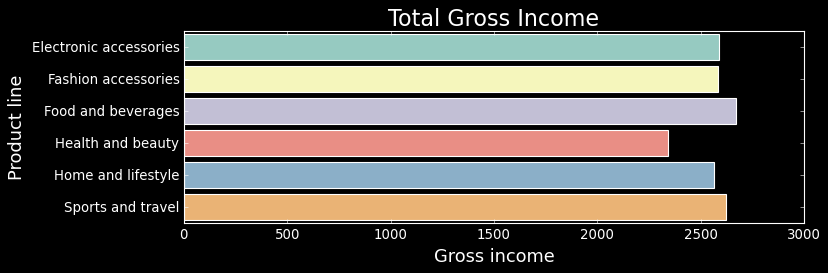

In [28]:
plt.figure(figsize=(10,3))
plt.style.use('dark_background')
ax = sns.barplot(y=df1.index, x='gross income', data=df1)
ax.set_xlabel(xlabel = "Gross income", fontsize=16)
ax.set_ylabel(ylabel = "Product line", fontsize=16)
ax.set_title(label = "Total Gross Income", fontsize=20)